Extracting all necessary packages


In [1]:
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

# configure notebook for plotting
%matplotlib inline 
mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# define default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

C:\Users\neha\AppData\Local\Temp\ipykernel_19260\2746787847.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme


In [4]:
ddir = "universe_8/"
stars = pd.read_csv(ddir+'Top/Star_Data.csv') 
print(stars.keys())

Index(['Name', 'X', 'Y', 'BlueF', 'GreenF', 'RedF', 'Parallax',
       'RadialVelocity', 'Variable?'],
      dtype='object')


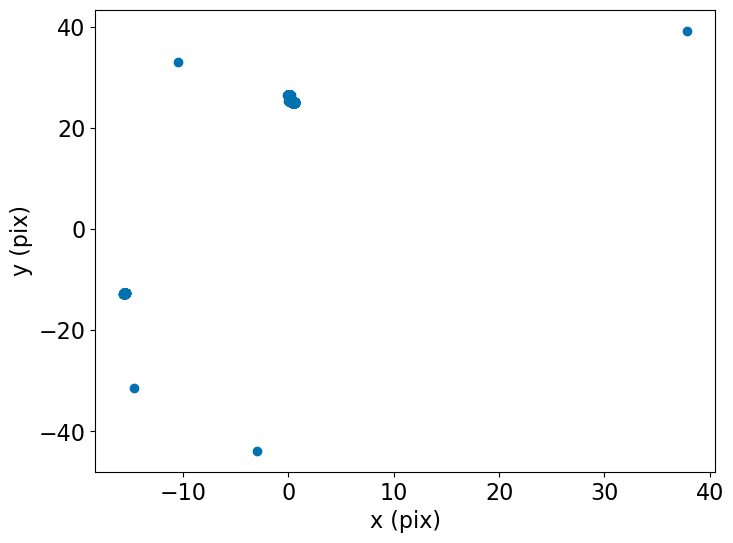

In [11]:
plt.scatter(stars.X,stars.Y)
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')

Text(0, 0.5, 'y (pix)')

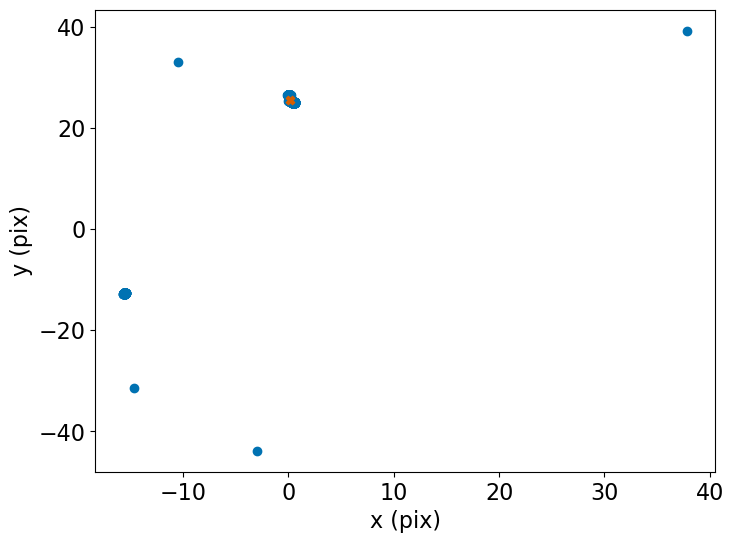

In [24]:
centre = (0.2, 25.5)
plt.scatter(stars.X,stars.Y)
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')

Text(0, 0.5, 'y (pix)')

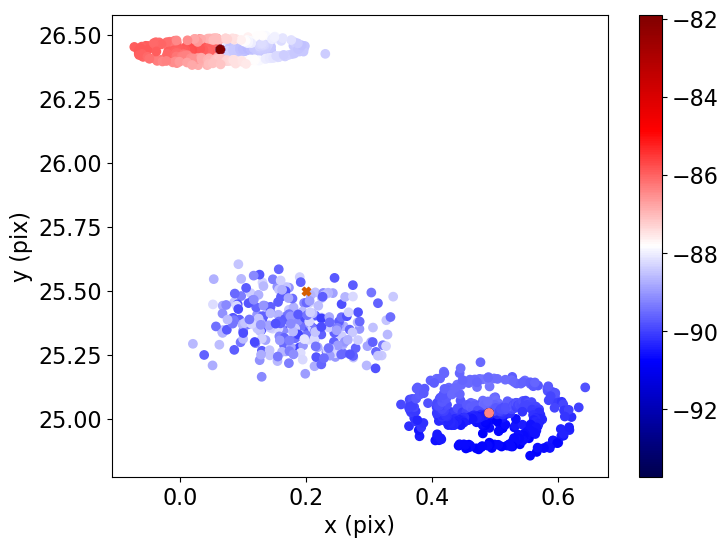

In [41]:
d = np.sqrt((stars.X-centre[0])** 2 + (stars.Y - centre[1])**2)
galaxy = stars[d<1] # filter to only close ones
plt.scatter(galaxy.X,galaxy.Y,c=galaxy.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

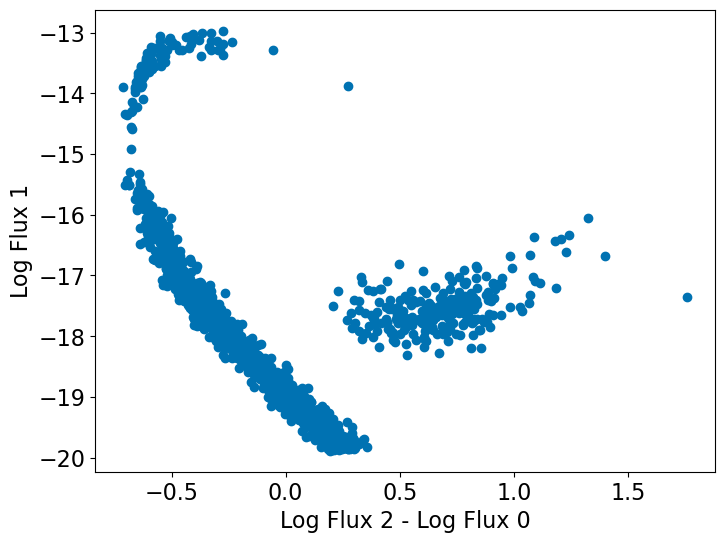

In [27]:
m0, m1, m2 = (np.log10(galaxy['BlueF']), 
              np.log10(galaxy['GreenF']), 
              np.log10(galaxy['RedF'])) 
colour = m2-m0

colour = m2-m0

s = plt.scatter(colour,m1)
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')


In [31]:
import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')


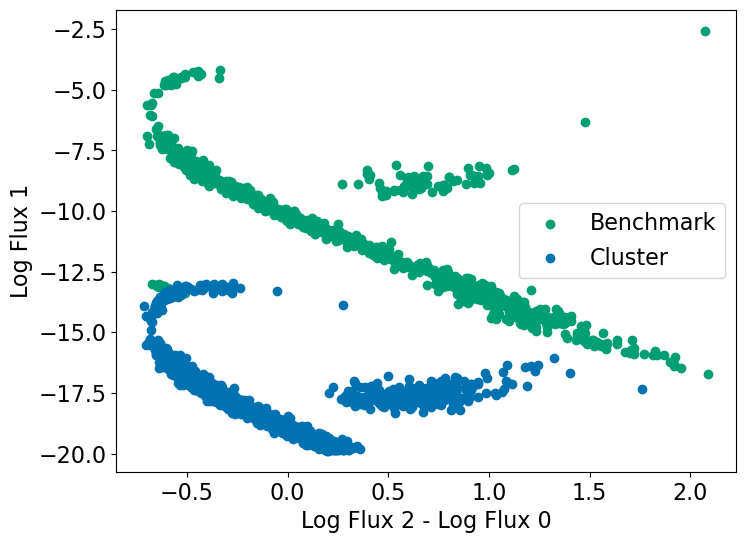

In [33]:
fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        # i'm assuming we pass stars with a large signal noise ratio
        pass

s = plt.scatter(colour,m1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

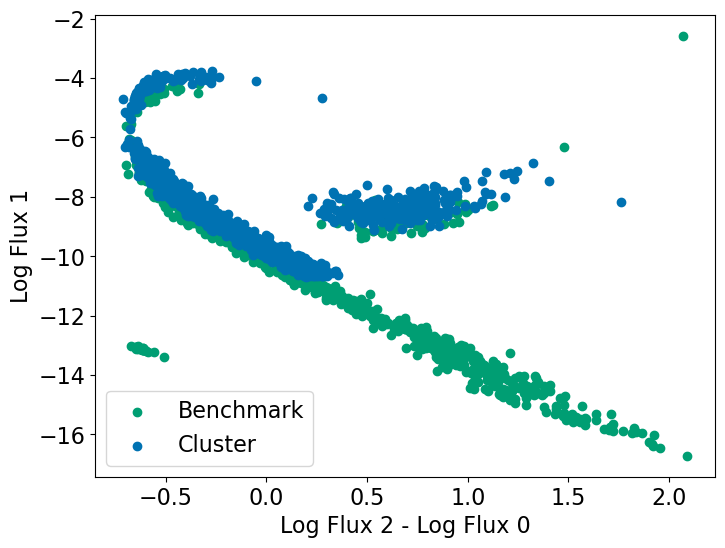

In [35]:
fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+9.2,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

In [36]:
10**(np.array([8.8,9.0])/2)

array([25118.8643151 , 31622.77660168])